##Exercise Interpolation

In [4]:
%matplotlib inline
import math
import numpy as np
from matplotlib import pyplot as plt

1) Plot these four points (2,3), (3,1), (4,2), (5,2).

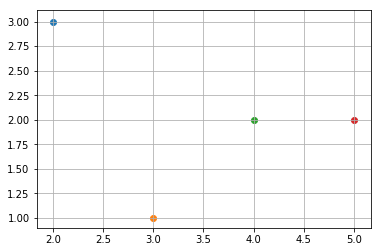

In [5]:
plt.scatter(2,3)
plt.scatter(3,1)
plt.scatter(4,2)
plt.scatter(5,2)
plt.grid()
xd = [2,3,4,5]
yd = [3,1,2,2]
xs = np.linspace(0,6, 100)

2) Find the polynomial of degree 3 that pass through these four points. Plot to verify.

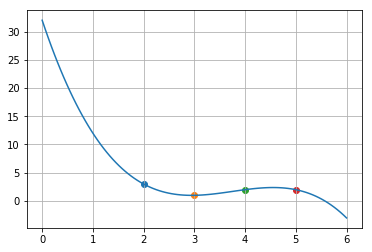

In [6]:
plt.scatter(2,3)
plt.scatter(3,1)
plt.scatter(4,2)
plt.scatter(5,2)
plt.grid()
plt.plot(xs,(3*(xs-3)*(xs-4)*(xs-5))/((2-3)*(2-4)*(2-5))+((xs-2)*(xs-4)*(xs-5))/((3-2)*(3-4)*(3-5))+(2*(xs-2)*(xs-3)*(xs-5))/((4-2)*(4-3)*(4-5))+(2*(xs-2)*(xs-3)*(xs-4))/((5-2)*(5-3)*(5-4)))

3) Find polynomial of degree 3 that pass through these four points. Plot to verify.

(1,2) (2,0) (3,2) (7,1)

In [7]:
##try this your self na Hahahaa

4) Write a function `ledendre(x, xs, ys)` which compute the legendre polynomial given the list of x values in xs and y values in ys.

`legendre(1.5, [1,2,3,7], [2,0,2,1])`

should have the same value as the polymial you found in 3) evaluated at x=1.5.

For those of you who know functional programming try write a functor that return a polynomial.

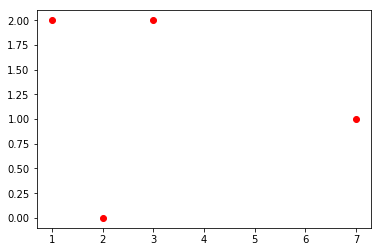

In [8]:
plt.plot([1,2,3,7], [2,0,2,1], "o", color = "red")

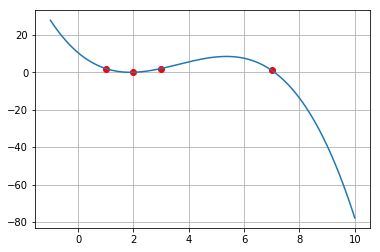

In [9]:
xs = np.linspace(-1,10, 1000)
plt.grid()
def my_legendre(x, xs, ys):
    #fill in
    val = 0
    for i in range(len(xs)):
        nu = 1
        de = 1
        for j in range(len(xs)):
            if(j!= i):
                nu *= (x - xs[j])
                de *= (xs[i] - xs[j])
                
        val += (ys[i]*nu/de)
        
    return val

plt.plot([1,2,3,7], [2,0,2,1], "o", color = "red")
plt.plot(xs,[my_legendre(x,[1,2,3,7],[2,0,2,1]) for x in xs])

In [10]:
def legendre_generator(xs,ys):## AJ'S VERSION
    nterms = len(xs)
    def legendre(x):
        s = 0
        for ix in range(nterms):
            numerator = ys[ix]
            for inum in range(nterms):
                if inum !=ix:
                    numerator *= (x-xs[inum])/(xs[ix]-xs[inum])
            s += numerator
        return s
    return legendre

5) Now sample 11 points  from $f(x) = \sin(x)$ for for $x\in[0, \pi]$. Plot $\sin(x)$ along with those 11 points. Make sure your $\sin(x)$ is plotted with more than 100 points

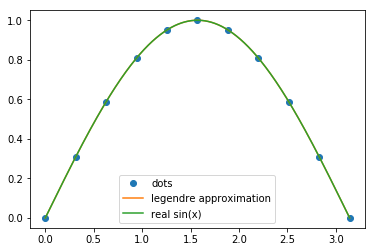

In [11]:
xs = np.linspace(0, np.pi,11)
ys = np.sin(xs)
plt.plot(xs, ys,"o",label = "dots")
leg = legendre_generator(xs,ys)
linexs = np.linspace(0, np.pi,1000)
lineys = [leg(x) for x in linexs]
plt.plot(linexs,lineys, label = "legendre approximation")
plt.plot(linexs, [np.sin(x) for x in linexs], label = "real sin(x)")
plt.legend()

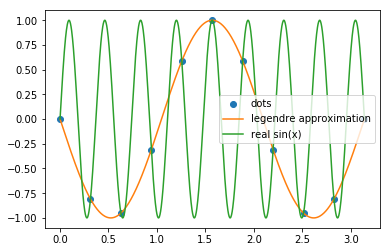

In [12]:
##my non sense
xs = np.linspace(0, np.pi,11)
ys = np.sin(17*xs)
plt.plot(xs, ys,"o",label = "dots")
leg = legendre_generator(xs,ys)
linexs = np.linspace(0, np.pi,1000)
lineys = [leg(x) for x in linexs]
plt.plot(linexs,lineys, label = "legendre approximation")
plt.plot(linexs, [np.sin(17*x) for x in linexs], label = "real sin(x)")
plt.legend()

6) Plot legendre polynomial for these points. How similar is it to $\sin(x)$ function. Make sure your legendre is plotte with at least 100 points.

In [13]:
#already did

7) Now sample 11 points  from $f(x) = \sin(200x)$ for for $x\in[0, \pi]$. Plot $\sin(x)$ along with those 11 points. Note the 200. Then plot legendre polynomial for these points.

In [14]:
#already did

8) Does it pass through all the point? Does it look like the original function.

In [15]:
#might be no need to check

##Exercise Integration

0) What is $$ \int \limits_{x=1}^{x=3} x^3 \; dx $$

In [16]:
##To lazy to do it by hand

1)Use Trapezoid Rule to calculate

$$ \int \limits_{x=1}^{x=3} x^3 \; dx $$

Using 1 piece.

In [17]:
def trapz(f,a,b,n):
    edges = np.linspace(a,b,n+1)
    h = (b-a)/n
    return (sum([f(e) for e in edges[1:-1]]) + 0.5*(f(a) + f(b)))*h
trapz(lambda x: x**3,1,3,10)

20.080000000000002

2)Use Trapezoid Rule to calculate

$$ \int \limits_{x=1}^{x=3} x^3 \; dx $$

Using 100 pieces.

In [18]:
def trapz(f,a,b,n):
    edges = np.linspace(a,b,n+1)
    h = (b-a)/n
    return (sum([f(e) for e in edges]) -0.5*(f(a) + f(b)))*h
ans = trapz(lambda x: x**3,1,3,100)
print(ans)
# def f(x): == lambda x: x**3
#     return x**3

20.0008


3) What is the bound on error for 1)?

In [19]:
e = 1/12*2**3/100**2*18

4) What is the bound on error for 2)?

In [20]:
e = 1/12*2**3/100**2*18
print(ans-e)
print(ans+e)

19.9996
20.002


5) Compute the following integral
$$ \int \limits_{x=0}^{x=1} e^{-x} \sin(x^2) \; dx $$

using 100 sub divisions. This is one of those thing you can't do by hands. 

In [21]:
def f(x):
    return np.exp(-x)*np.sin(x**2)
ans = trapz(f,0,1,100)
print(ans)


0.150913300269


6) If we want compute
$$ \int \limits_{x=0}^{x=1} e^{-x} \; dx $$
that is at most $10^{-6}$ away from the real answer. How many subdivisions do we need?

In [29]:
def ddf(x):
    return np.exp(-x)

def error(a,b,n,ddf,xi):
    return (b-a)**3/(12*n**2)*ddf(xi)

def cal_error_term(eb,a,b,ddf,xi):
    n =1
    e = error(a,b,n,ddf,xi)
    while(eb< abs(e)):
        n +=1
        e = error(a,b,n,ddf,xi)
    return n
cal_error_term(1e-6,0,1,ddf,1)
    

176

7) Compute the integral above and make sure your answer is at most $10^-6$ away from the real answer. 

In [30]:
def trapz(f,a,b,n):
    edges = np.linspace(a,b,n+1)
    h = (b-a)/n
    return (sum([f(e) for e in edges]) - 0.5*(f(a) + f(b)))*h

ans = trapz(ddf,0,1, 176)
print(ans)

0.632122259393
